In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import data
df_netflix = pd.read_csv('NetflixViewingHistory.csv')

In [3]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   4700 non-null   object
 1   Date    4700 non-null   object
dtypes: object(2)
memory usage: 73.6+ KB


In [4]:
df_netflix.head()

,Title,Date
0,How to Fix a Drug Scandal: Limited Series: Epi...,4/3/20
1,How to Fix a Drug Scandal: Limited Series: Epi...,4/3/20
2,How to Fix a Drug Scandal: Limited Series: Epi...,4/2/20
3,How to Fix a Drug Scandal: Limited Series: Epi...,4/2/20
4,Feel Good: Season 1: Episode 6,4/2/20


In [5]:
df_netflix['Date'] = pd.to_datetime(df_netflix['Date'])
df_netflix['Year'], df_netflix['Month'] = df_netflix['Date'].dt.year, df_netflix['Date'].dt.month_name()
df_netflix['Day'] = df_netflix['Date'].dt.day
df_netflix['Day_of_week'] = df_netflix['Date'].dt.day_name()

In [6]:
df_netflix.head()

,Title,Date,Year,Month,Day,Day_of_week
0,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday
1,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday
2,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday
3,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday
4,Feel Good: Season 1: Episode 6,2020-04-02,2020,April,2,Thursday


In [7]:
show_details = df_netflix.Title.str.split(":", expand = True, n = 2)
df_netflix['show_name'] = show_details[0]
df_netflix['season'] = show_details[1]
df_netflix['episode_name'] = show_details[2]

In [8]:
df_netflix.head()

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name
0,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday,How to Fix a Drug Scandal,Limited Series,Episode 4
1,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday,How to Fix a Drug Scandal,Limited Series,Episode 3
2,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday,How to Fix a Drug Scandal,Limited Series,Episode 2
3,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday,How to Fix a Drug Scandal,Limited Series,Episode 1
4,Feel Good: Season 1: Episode 6,2020-04-02,2020,April,2,Thursday,Feel Good,Season 1,Episode 6


In [9]:
df_netflix['show_type'] = df_netflix.apply(lambda x:'Movie' if pd.isnull(x['season']) else 'TV Show', axis=1)
df_netflix

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name,show_type
0,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday,How to Fix a Drug Scandal,Limited Series,Episode 4,TV Show
1,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday,How to Fix a Drug Scandal,Limited Series,Episode 3,TV Show
2,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday,How to Fix a Drug Scandal,Limited Series,Episode 2,TV Show
3,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday,How to Fix a Drug Scandal,Limited Series,Episode 1,TV Show
4,Feel Good: Season 1: Episode 6,2020-04-02,2020,April,2,Thursday,Feel Good,Season 1,Episode 6,TV Show
...,...,...,...,...,...,...,...,...,...,...
4695,Jane The Virgin: Season 1: Chapter Five,2016-04-12,2016,April,12,Tuesday,Jane The Virgin,Season 1,Chapter Five,TV Show
4696,Jane The Virgin: Season 1: Chapter Four,2016-04-11,2016,April,11,Monday,Jane The Virgin,Season 1,Chapter Four,TV Show
4697,Jane The Virgin: Season 1: Chapter Three,2016-04-11,2016,April,11,Monday,Jane The Virgin,Season 1,Chapter Three,TV Show
4698,Jane The Virgin: Season 1: Chapter Two,2016-04-11,2016,April,11,Monday,Jane The Virgin,Season 1,Chapter Two,TV Show


In [10]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         4700 non-null   object        
 1   Date          4700 non-null   datetime64[ns]
 2   Year          4700 non-null   int64         
 3   Month         4700 non-null   object        
 4   Day           4700 non-null   int64         
 5   Day_of_week   4700 non-null   object        
 6   show_name     4700 non-null   object        
 7   season        4393 non-null   object        
 8   episode_name  4315 non-null   object        
 9   show_type     4700 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 367.3+ KB


In [11]:
test = df_netflix.groupby('show_type')
test.count()

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name
show_type,,,,,,,,,
Movie,307,307,307,307,307,307,307,0,0
TV Show,4393,4393,4393,4393,4393,4393,4393,4393,4315


In [12]:
df_netflix.head()

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name,show_type
0,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday,How to Fix a Drug Scandal,Limited Series,Episode 4,TV Show
1,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-03,2020,April,3,Friday,How to Fix a Drug Scandal,Limited Series,Episode 3,TV Show
2,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday,How to Fix a Drug Scandal,Limited Series,Episode 2,TV Show
3,How to Fix a Drug Scandal: Limited Series: Epi...,2020-04-02,2020,April,2,Thursday,How to Fix a Drug Scandal,Limited Series,Episode 1,TV Show
4,Feel Good: Season 1: Episode 6,2020-04-02,2020,April,2,Thursday,Feel Good,Season 1,Episode 6,TV Show


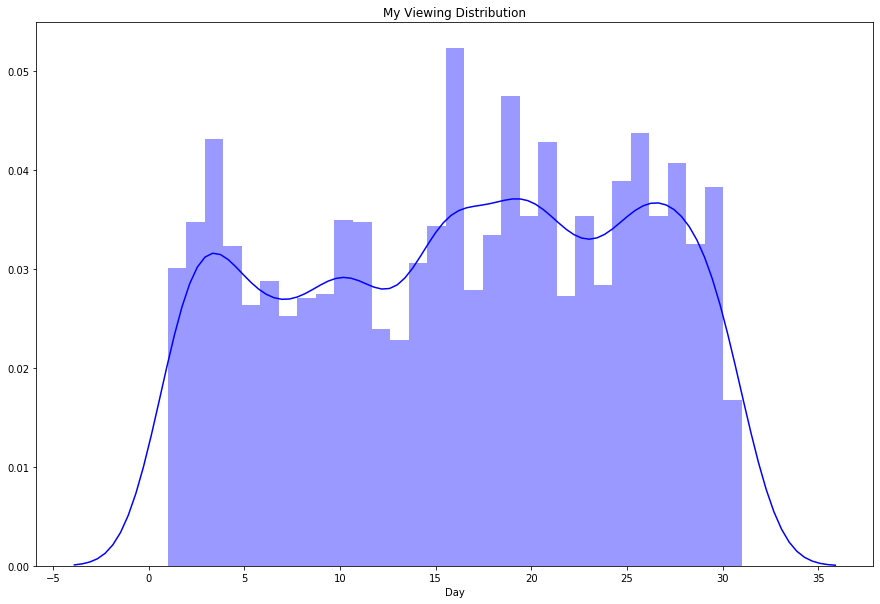

In [13]:
plt.figure(figsize=(15,10))
plt.title("My Viewing Distribution")
ax = sns.distplot(df_netflix['Day'],bins=31,color="blue",hist=True)

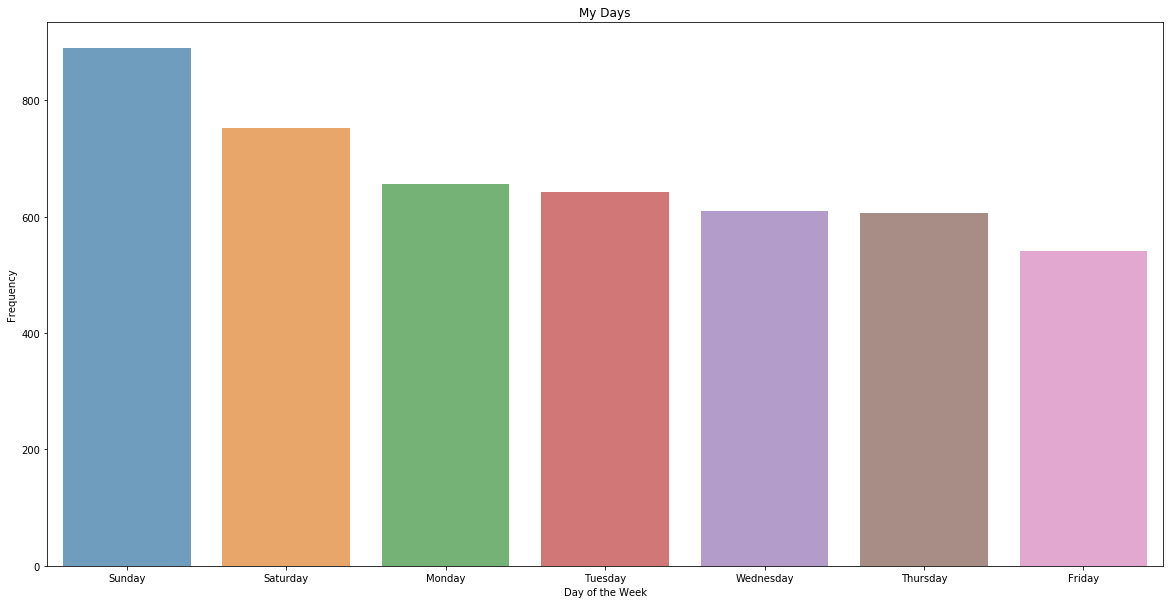

In [14]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df_netflix["Day_of_week"].value_counts().index, y=df_netflix["Day_of_week"].value_counts(),alpha=0.7)
plt.title("My Days")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.show();

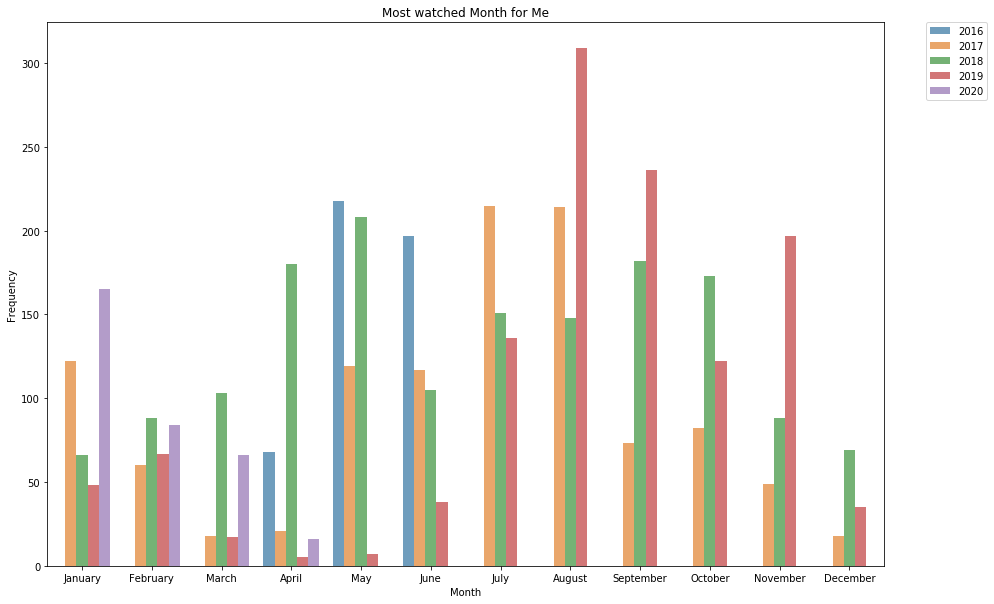

In [15]:
by_year = df_netflix.groupby('Month')['Year'].value_counts().sort_values(ascending=False).reset_index(name='Frequency')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,10))
ax = sns.barplot(x=by_year["Month"], y=by_year["Frequency"],order=month_order, hue=by_year["Year"],alpha=0.7)
plt.title("Most watched Month for Me")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

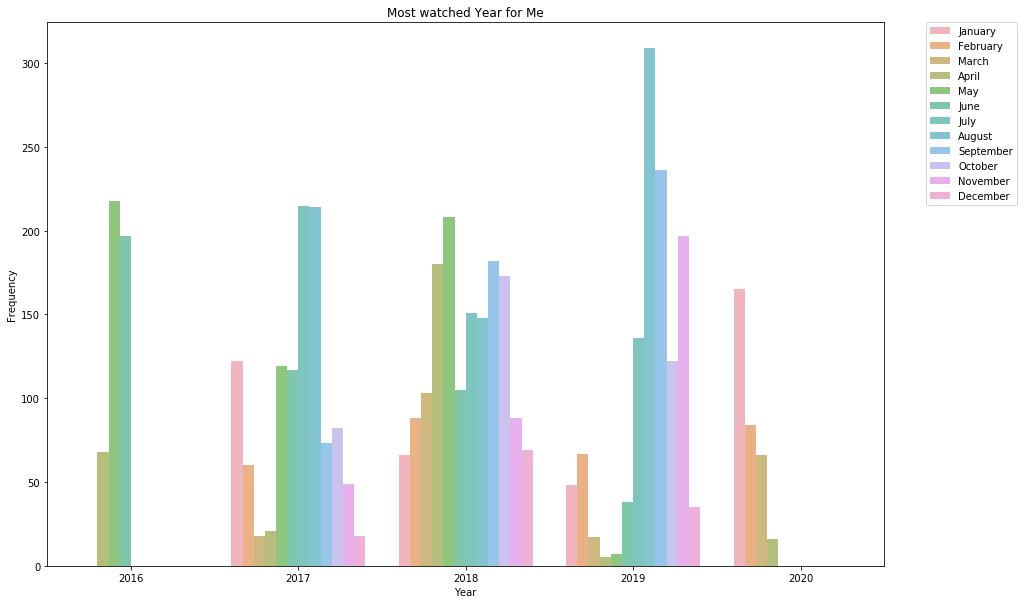

In [16]:
by_month = df_netflix.groupby('Month')['Year'].value_counts().sort_values(ascending=False).reset_index(name='Frequency')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,10))
ax = sns.barplot(x=by_month["Year"], y=by_month["Frequency"], hue=by_month["Month"], hue_order=month_order,alpha=0.7)
plt.title("Most watched Year for Me")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

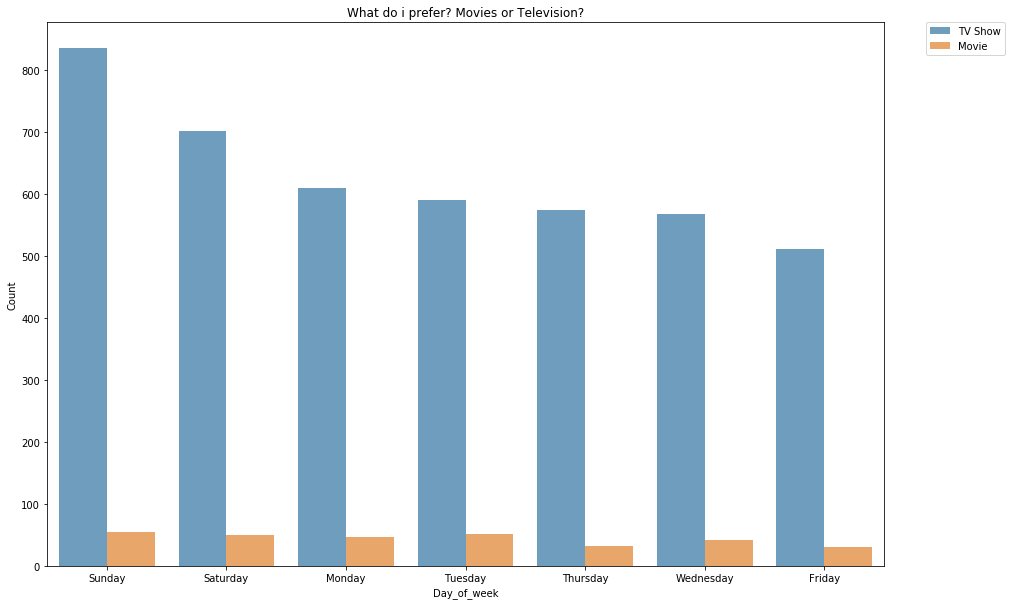

In [17]:
show_freq = df_netflix.groupby('show_type')['Day_of_week'].value_counts().sort_values(ascending=False).reset_index(name='Count')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=show_freq["Day_of_week"], y=show_freq["Count"], hue=show_freq["show_type"],alpha=0.7)
plt.title("What do i prefer? Movies or Television?")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

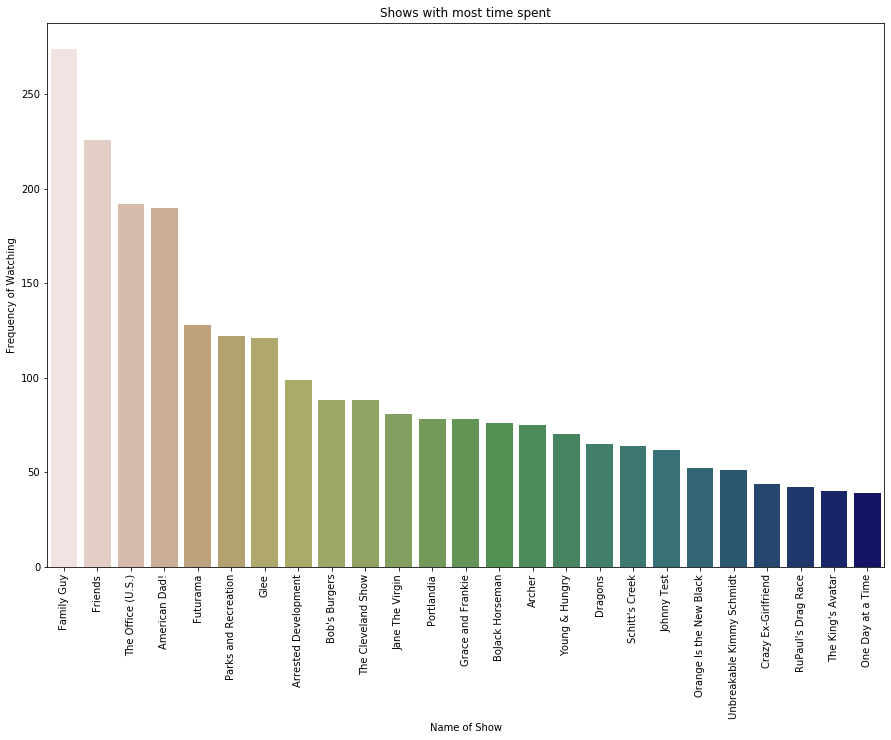

In [18]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=df_netflix['show_name'].sort_values(ascending=True).value_counts().index[:25], 
                 y=df_netflix["show_name"].sort_values(ascending=True).value_counts()[:25],
                 palette="gist_earth_r")
plt.title("Shows with most time spent")
plt.xlabel("Name of Show")
plt.ylabel("Frequency of Watching")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)
plt.show();